# Import all basic libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read dataset

In [10]:
dataset = pd.read_csv("IRIS_Dataset.csv")

# Let's see the dataset

In [11]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# check missing values

In [13]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Lets see the different types of the iris species and their respective numbers in the dataset

In [14]:
dataset['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

# Let's plot a histogram graph

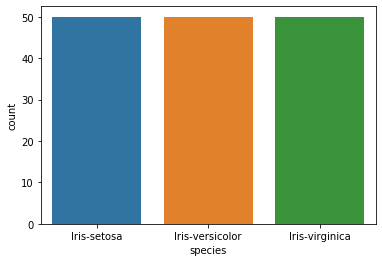

In [15]:
sns.countplot(x='species',data=dataset)

# Encoding categorical data

In [16]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
dataset.species = encode.fit_transform(dataset.species)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Create dependent and independent features

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [18]:
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# we will now see which of the columns contain the most variance in the species prediction


In [19]:
dataset.corr()[['species']].sort_values(by='species',ascending=False)

,species
species,1.000000
petal_width,0.956464
petal_length,0.949043
sepal_length,0.782561
sepal_width,-0.419446


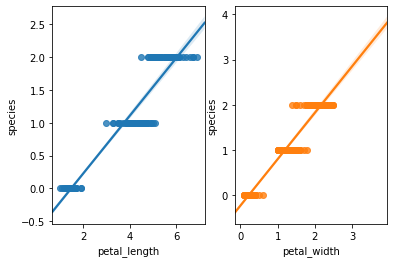

In [20]:
fig, ax =plt.subplots(1,2)
sns.regplot(x='petal_length',y='species',data=dataset,ax=ax[0])
sns.regplot(x='petal_width',y='species',data=dataset,ax=ax[1])

## split our dataset into training and test set for training set

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train.shape

(120, 4)

In [23]:
X_test.shape

(30, 4)

# Now let's build our K-NN model  ,Choosing the optimal value of K 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy
from sklearn import metrics
#lets run from k = 1 to k=25 
k_range = range(1,26)
accuracy_score = {}
test_acc_score = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    accuracy_score[k] = metrics.accuracy_score(y_train,y_pred)
    y_pred = knn.predict(X_test)
    test_acc_score[k] = metrics.accuracy_score(y_test,y_pred)

# plot the relationship between K and accuracy of the model

{1: 1.0, 2: 0.9666666666666667, 3: 0.9666666666666667, 4: 1.0, 5: 0.9666666666666667, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0}


Text(0.5, 0, 'K')

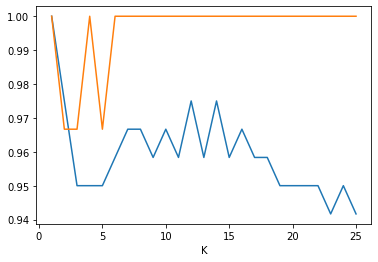

In [25]:
plt.plot(k_range,list(accuracy_score.values()))
print(test_acc_score)
plt.plot(k_range,list(test_acc_score.values()))
plt.xlabel("K")

In [26]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [27]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [28]:
y_pred  = encode.inverse_transform(y_pred)


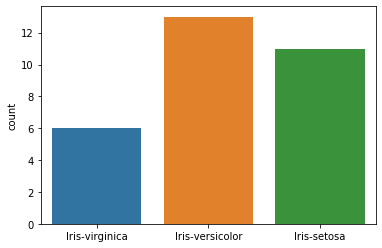

In [29]:
sns.countplot(y_pred)

In [35]:
new_flower = knn.predict([[5.4, 2.1, 5.0, 2.6],])
print(encode.inverse_transform(new_flower))

['Iris-virginica']
